<a href="https://colab.research.google.com/github/baronbasit/FASTAIJupyterNoteBooks/blob/master/FoodClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!curl -s https://course.fast.ai/setup/colab | bash

Updating fastai...
Done.


In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
from fastai.vision import *
from fastai.metrics import error_rate

In [0]:
bs = 64


In [5]:
doc(ImageDataBunch.from_csv)

In [6]:
path = untar_data(URLs.FOOD); 
path

PosixPath('/content/data/food-101')

In [7]:
path.ls()

[PosixPath('/content/data/food-101/test.json'),
 PosixPath('/content/data/food-101/train.json'),
 PosixPath('/content/data/food-101/h5'),
 PosixPath('/content/data/food-101/classes.txt'),
 PosixPath('/content/data/food-101/labels.txt'),
 PosixPath('/content/data/food-101/images'),
 PosixPath('/content/data/food-101/test.txt'),
 PosixPath('/content/data/food-101/train.txt')]

In [0]:
img_path = path/'images'

In [9]:
img_path.ls()

[PosixPath('/content/data/food-101/images/spring_rolls'),
 PosixPath('/content/data/food-101/images/pho'),
 PosixPath('/content/data/food-101/images/eggs_benedict'),
 PosixPath('/content/data/food-101/images/escargots'),
 PosixPath('/content/data/food-101/images/ice_cream'),
 PosixPath('/content/data/food-101/images/red_velvet_cake'),
 PosixPath('/content/data/food-101/images/models'),
 PosixPath('/content/data/food-101/images/pulled_pork_sandwich'),
 PosixPath('/content/data/food-101/images/hamburger'),
 PosixPath('/content/data/food-101/images/carrot_cake'),
 PosixPath('/content/data/food-101/images/chicken_wings'),
 PosixPath('/content/data/food-101/images/frozen_yogurt'),
 PosixPath('/content/data/food-101/images/caprese_salad'),
 PosixPath('/content/data/food-101/images/spaghetti_bolognese'),
 PosixPath('/content/data/food-101/images/chicken_curry'),
 PosixPath('/content/data/food-101/images/beignets'),
 PosixPath('/content/data/food-101/images/ramen'),
 PosixPath('/content/data/f

In [0]:
train = pd.read_csv(path/'train.txt', delimiter='/', header=None, names=['label', 'name'])


In [11]:
train['name'] = train['label'].astype(str) + '/' + train['name'].astype(str) + '.jpg'
train.head()

,label,name
0,apple_pie,apple_pie/1005649.jpg
1,apple_pie,apple_pie/1014775.jpg
2,apple_pie,apple_pie/1026328.jpg
3,apple_pie,apple_pie/1028787.jpg
4,apple_pie,apple_pie/1043283.jpg


In [12]:
train = train[['name', 'label']]; train.head()


,name,label
0,apple_pie/1005649.jpg,apple_pie
1,apple_pie/1014775.jpg,apple_pie
2,apple_pie/1026328.jpg,apple_pie
3,apple_pie/1028787.jpg,apple_pie
4,apple_pie/1043283.jpg,apple_pie


In [13]:
Counter(train['label'])


Counter({'apple_pie': 750,
         'baby_back_ribs': 750,
         'baklava': 750,
         'beef_carpaccio': 750,
         'beef_tartare': 750,
         'beet_salad': 750,
         'beignets': 750,
         'bibimbap': 750,
         'bread_pudding': 750,
         'breakfast_burrito': 750,
         'bruschetta': 750,
         'caesar_salad': 750,
         'cannoli': 750,
         'caprese_salad': 750,
         'carrot_cake': 750,
         'ceviche': 750,
         'cheese_plate': 750,
         'cheesecake': 750,
         'chicken_curry': 750,
         'chicken_quesadilla': 750,
         'chicken_wings': 750,
         'chocolate_cake': 750,
         'chocolate_mousse': 750,
         'churros': 750,
         'clam_chowder': 750,
         'club_sandwich': 750,
         'crab_cakes': 750,
         'creme_brulee': 750,
         'croque_madame': 750,
         'cup_cakes': 750,
         'deviled_eggs': 750,
         'donuts': 750,
         'dumplings': 750,
         'edamame': 750,
         '

In [0]:
tfms = get_transforms(do_flip=False)


In [0]:
data = ImageDataBunch.from_df(path/'images', train,
                             fn_col=0, label_col=1, ds_tfms=get_transforms(), size=224, bs=bs).normalize(imagenet_stats)


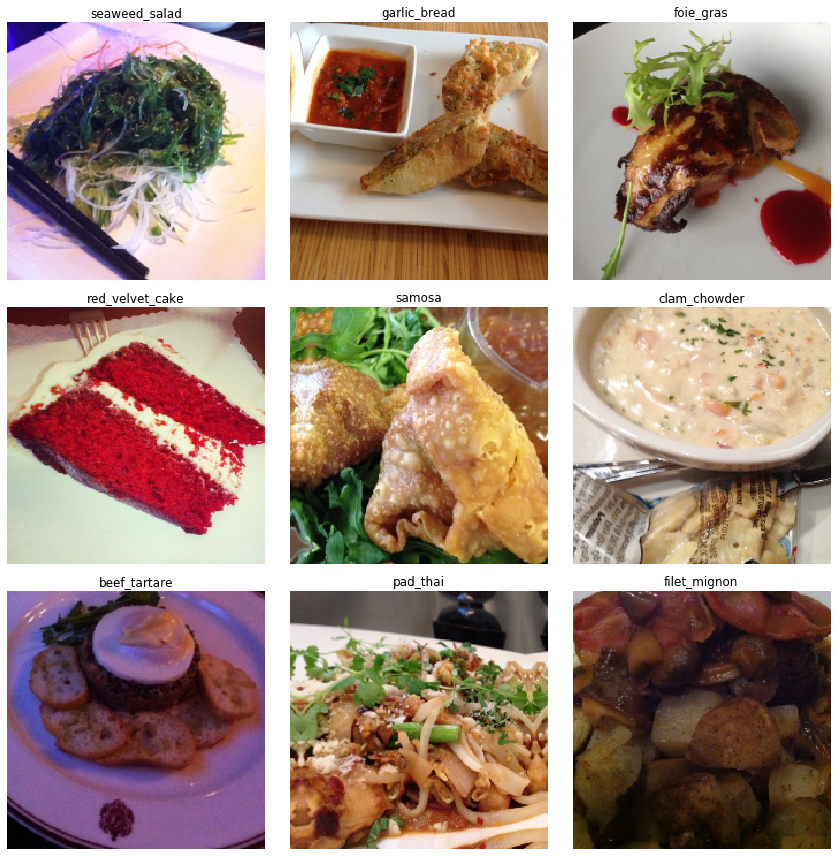

In [16]:
data.show_batch(rows=3, figsize=(12,12))


In [17]:
print(data.classes)


['apple_pie', 'baby_back_ribs', 'baklava', 'beef_carpaccio', 'beef_tartare', 'beet_salad', 'beignets', 'bibimbap', 'bread_pudding', 'breakfast_burrito', 'bruschetta', 'caesar_salad', 'cannoli', 'caprese_salad', 'carrot_cake', 'ceviche', 'cheese_plate', 'cheesecake', 'chicken_curry', 'chicken_quesadilla', 'chicken_wings', 'chocolate_cake', 'chocolate_mousse', 'churros', 'clam_chowder', 'club_sandwich', 'crab_cakes', 'creme_brulee', 'croque_madame', 'cup_cakes', 'deviled_eggs', 'donuts', 'dumplings', 'edamame', 'eggs_benedict', 'escargots', 'falafel', 'filet_mignon', 'fish_and_chips', 'foie_gras', 'french_fries', 'french_onion_soup', 'french_toast', 'fried_calamari', 'fried_rice', 'frozen_yogurt', 'garlic_bread', 'gnocchi', 'greek_salad', 'grilled_cheese_sandwich', 'grilled_salmon', 'guacamole', 'gyoza', 'hamburger', 'hot_and_sour_soup', 'hot_dog', 'huevos_rancheros', 'hummus', 'ice_cream', 'lasagna', 'lobster_bisque', 'lobster_roll_sandwich', 'macaroni_and_cheese', 'macarons', 'miso_sou

In [18]:
print(data.classes)
len(data.classes),data.c

['apple_pie', 'baby_back_ribs', 'baklava', 'beef_carpaccio', 'beef_tartare', 'beet_salad', 'beignets', 'bibimbap', 'bread_pudding', 'breakfast_burrito', 'bruschetta', 'caesar_salad', 'cannoli', 'caprese_salad', 'carrot_cake', 'ceviche', 'cheese_plate', 'cheesecake', 'chicken_curry', 'chicken_quesadilla', 'chicken_wings', 'chocolate_cake', 'chocolate_mousse', 'churros', 'clam_chowder', 'club_sandwich', 'crab_cakes', 'creme_brulee', 'croque_madame', 'cup_cakes', 'deviled_eggs', 'donuts', 'dumplings', 'edamame', 'eggs_benedict', 'escargots', 'falafel', 'filet_mignon', 'fish_and_chips', 'foie_gras', 'french_fries', 'french_onion_soup', 'french_toast', 'fried_calamari', 'fried_rice', 'frozen_yogurt', 'garlic_bread', 'gnocchi', 'greek_salad', 'grilled_cheese_sandwich', 'grilled_salmon', 'guacamole', 'gyoza', 'hamburger', 'hot_and_sour_soup', 'hot_dog', 'huevos_rancheros', 'hummus', 'ice_cream', 'lasagna', 'lobster_bisque', 'lobster_roll_sandwich', 'macaroni_and_cheese', 'macarons', 'miso_sou

(101, 101)

In [0]:
data.classes


In [0]:
learn = cnn_learner(data, models.resnet50, metrics=error_rate)


In [0]:
learn.model


In [22]:
learn.fit_one_cycle(4)


epoch,train_loss,valid_loss,error_rate,time
0,2.166778,1.705230,0.438746,20:38
1,1.684790,1.349326,0.353927,21:07
2,1.410292,1.186894,0.315380,20:50
3,1.265642,1.144836,0.303630,20:49


In [0]:
learn.save('resnet50Model_1');


In [24]:
print(data.c)


101


In [32]:
learn.lr_find()

epoch,train_loss,valid_loss,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


In [26]:
interp = ClassificationInterpretation.from_learner(learn)


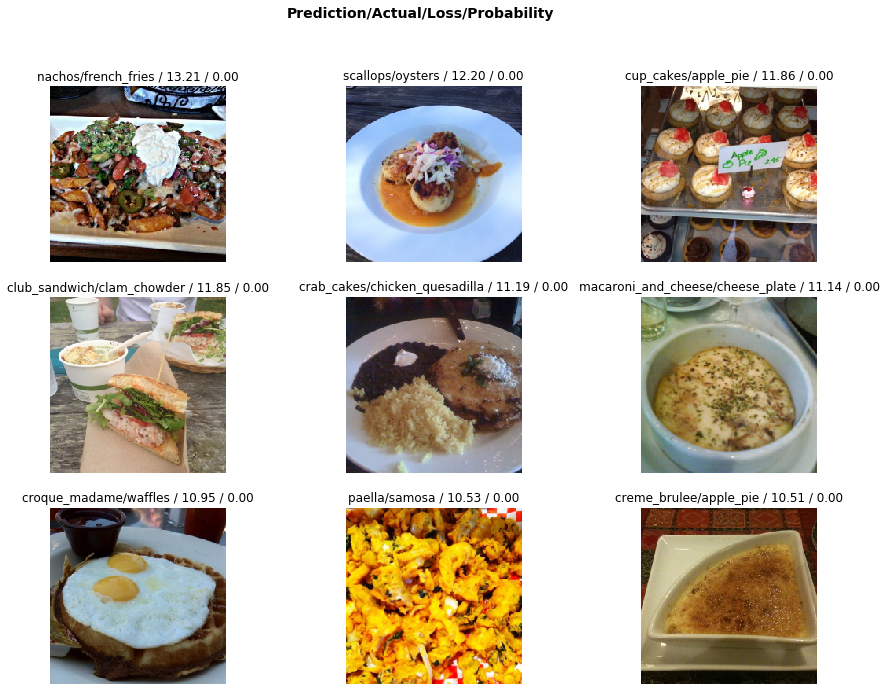

In [27]:
interp.plot_top_losses(9, figsize=(15, 11))


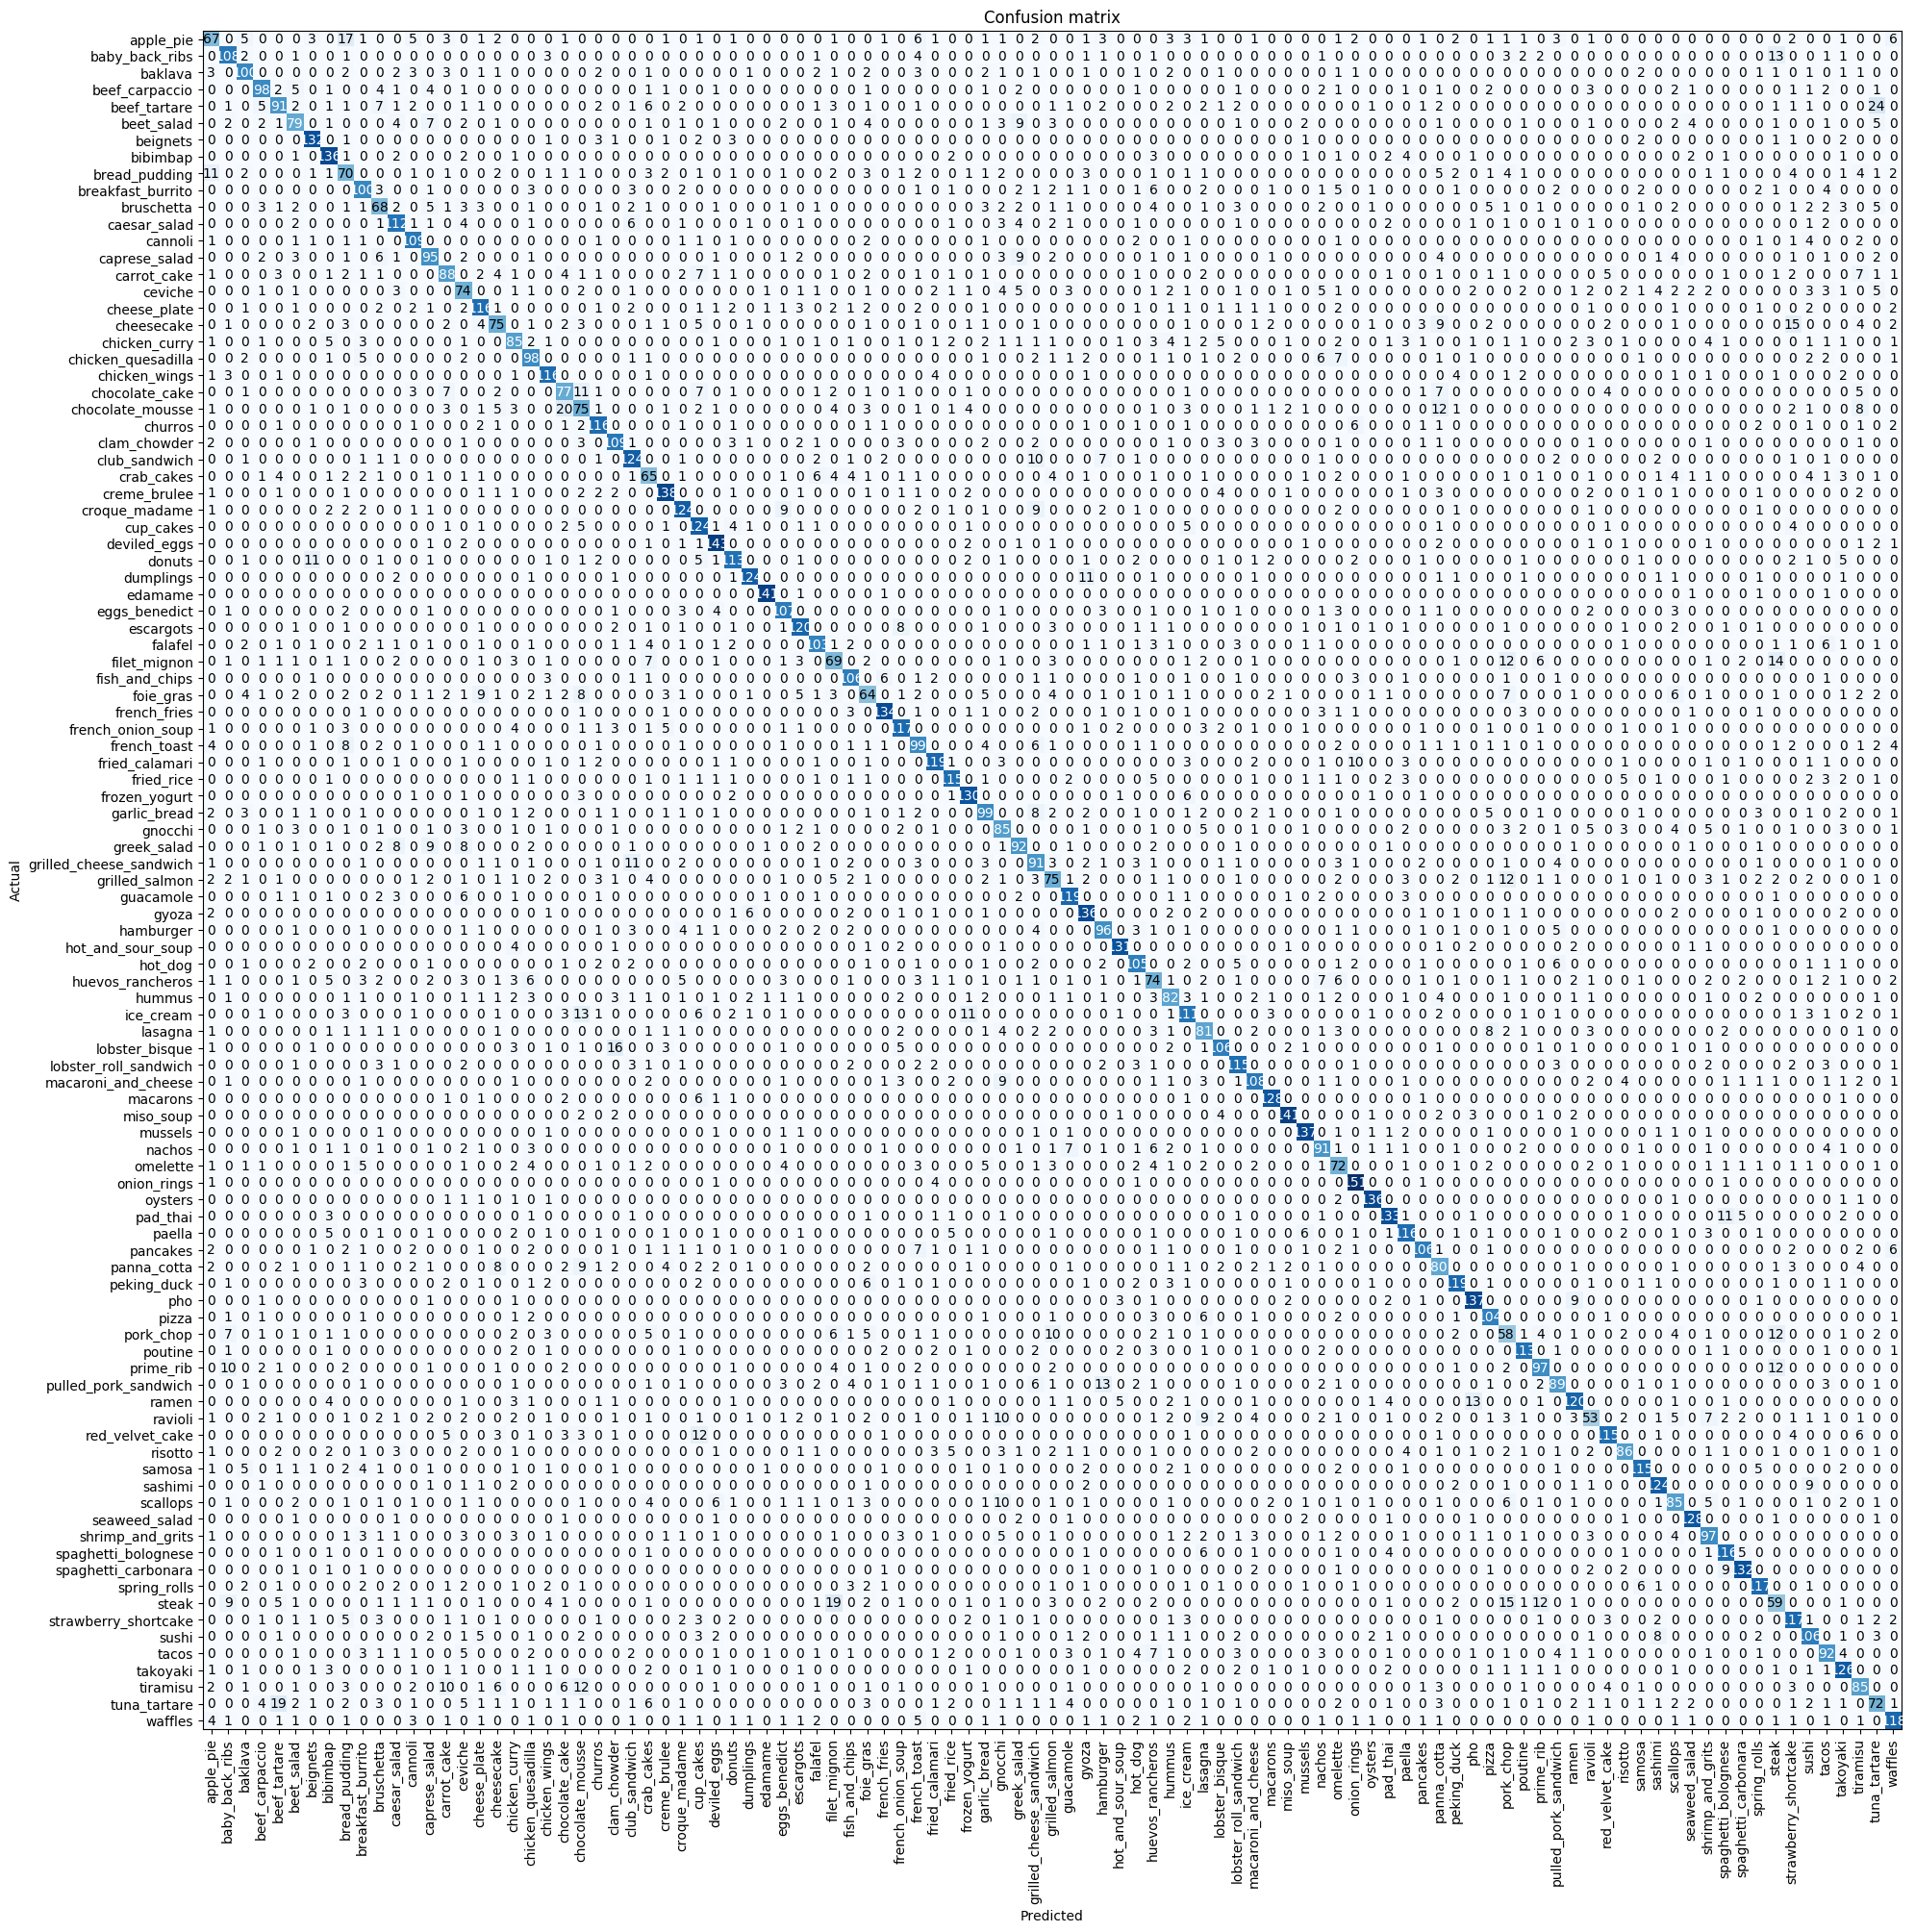

In [28]:
interp.plot_confusion_matrix(figsize=(20, 20), dpi=100)


In [31]:
interp.most_confused(min_val=2)


[('beef_tartare', 'tuna_tartare', 24),
 ('chocolate_mousse', 'chocolate_cake', 20),
 ('steak', 'filet_mignon', 19),
 ('tuna_tartare', 'beef_tartare', 19),
 ('apple_pie', 'bread_pudding', 17),
 ('lobster_bisque', 'clam_chowder', 16),
 ('cheesecake', 'strawberry_shortcake', 15),
 ('steak', 'pork_chop', 15),
 ('filet_mignon', 'steak', 14),
 ('baby_back_ribs', 'steak', 13),
 ('ice_cream', 'chocolate_mousse', 13),
 ('pulled_pork_sandwich', 'hamburger', 13),
 ('ramen', 'pho', 13),
 ('chocolate_mousse', 'panna_cotta', 12),
 ('filet_mignon', 'pork_chop', 12),
 ('grilled_salmon', 'pork_chop', 12),
 ('pork_chop', 'steak', 12),
 ('prime_rib', 'steak', 12),
 ('red_velvet_cake', 'cup_cakes', 12),
 ('steak', 'prime_rib', 12),
 ('tiramisu', 'chocolate_mousse', 12),
 ('bread_pudding', 'apple_pie', 11),
 ('chocolate_cake', 'chocolate_mousse', 11),
 ('donuts', 'beignets', 11),
 ('dumplings', 'gyoza', 11),
 ('grilled_cheese_sandwich', 'club_sandwich', 11),
 ('ice_cream', 'frozen_yogurt', 11),
 ('pad_thai

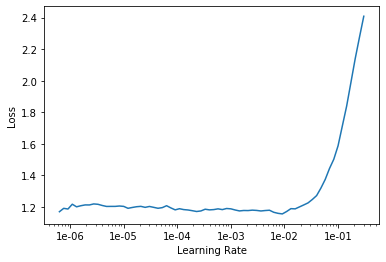

In [33]:
learn.recorder.plot()


In [0]:
learn.save('stage-2')
